# Synthesis Assignment (100)

## Group Information

Use the form fields below to input your group number and group member information.

In [ ]:
# @title Group Number { run: "auto" }
groups = list(range(1,23))
Group_Number = 16 # @param [groups] {type:"integer"}
print('Group Number:', Group_Number)

Group Number: 16


In [ ]:
# @title Group Member Full Names { run: "auto" }
Group_Member_1 = 'Kishan Khant' # @param {type:"string", placeholder:"Enter Full Name 1"}
Group_Member_2 = 'Nicholas Derienzo' # @param {type:"string", placeholder:"Enter Full Name 2"}
Group_Member_3 = 'Ananye Shobhith Gajula' # @param {type:"string", placeholder:"Enter Full Name 3"}
Group_Member_4 = 'Vakshika Gadusu' # @param {type:"string", placeholder:"Enter Full Name 4"}
Group_Member_5 = '' # @param {type:"string", placeholder:"Enter Full Name 5"}
print('Group Members:')
print(Group_Member_1)
print(Group_Member_2)
print(Group_Member_3)
print(Group_Member_4)
print(Group_Member_5)

Group Members:
Kishan Khant
Nicholas Derienzo
Ananye Shobhith Gajula
Vakshika Gadusu





---



## Directions
In the Synthesis Assignment, which will be submitted in two parts, your group will perform text analytics to solve a real-world business problem. As a group, you will choose one of the following 5 business problems and accompanying dataset.

<br>

| Business Problem (Prediction)| Topic | Data Type | Dataset Name |
| ----------- | ----------- | ----------- | ----------- |
| Rating or Sentiment|Lotion|Online reviews|lotion-reviews.csv|
| Spam Detection|         |E-mails|spam.csv|
| Rating or Recommendation | Airlines| Customer surveys| airlines.csv|
| Rating| Weight Loss Drugs|Customer surveys| weightloss.csv|
| Rating| Amazon Products| Online reviews|amazon_reviews.csv|

<br>

First, type your group number and group member names in the text cells above.

Rename this template file - <b>INFO585_SA_Group#.ipynb</b>, where # is the assignment number. As an example, Group 1's Synthesis Assignment submission would be named **INFO585_SA_Group1.ipynb**. Note: Your .pdf submission file naming will also follow this format.

<br>

**Submission:**

Your submission (one per group) for each assignment part will include:
*  (1) .ipynb file (with code run), following the naming instructions above
* (1) .pdf of the .ipynb file (with all code run). Can be obtained using File -> Print.


<br>

**Overview:**

<br>

**Part 1**

**Due:** 12/1 at 11:59 PM ET

In Part 1, you will define the business problem, cleanse and preprocess the data, and perform exploratory data analysis. To complete Part 1, you will fill in the required information in the [Part 1](#scrollTo=cwyEfhMwUTT1) Section.

<br>

**Part 2**

**Due:** 12/15 at 11:59 PM ET

In Part 2, you will perform predictive analysis, evaluate your predictive models, and make recommendations and discuss your results within the context of the business problem. To complete Part 2, you will fill include all required information for Part 1 and fill in the required information in the [Part 2](#scrollTo=8fZ_eKishBVo) Section.


<hr>
<br>

# **Part 1 (50)**

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will include all prerequisite code (load packages, etc.) necessary for your code in Part 1  to run in the [Prerequisite Code](#scrollTo=1NApcFUYjX8g) Section below.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

**Note:** Your Part 1 submission will only include responses for Part 1. Part 2 should remain hidden in the Part 1 submission.

<br>

**Submission:**

**Due:** 12/1 at 11:59 PM ET

**Points:** 50

Your submission (one per group) for Part 1 will include:
*  (1) .ipynb file (with code run), following the naming instructions above
* (1) .pdf of the .ipynb file (with code run). Can be obtained using File -> Print.

**Note:** Your Part 1 submission will only include responses for Part 1. Please hide Part 2 if it contains any code or responses prior to submitting.





## 1.0 Prerequisite Code

In [ ]:
import pandas as pd
import io
import html
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## 1.1 Problem Definition & Statement (20)

**1.1 A (5) First, use the code cell below to identify your group's selected dataset and the target variable (column name) that will be used for predictive modeling.**

In [ ]:
# @title Identify Problem/Dataset

Dataset = 'airlines.csv' # @param ["lotion-reviews.csv", "spam.csv", "airlines.csv", "weightloss.csv", "amazon_reviews.csv"]
Target_Variable = 'overall_rating' # @param {type:"string"}

print(Dataset)
print(Target_Variable)


airlines.csv
overall_rating


**1.1 B (15) Next, use the text cell below for your problem definition and statement.**

**The problem statement should discuss the following: what is the problem and who it affects, financial/social implications of having a solution to the problem, how the model would be used in practice, and the acceptable level of model performance.**


### Definition and the Content of the Business Problem

**Problem Statement/Definition:**
The competition in the airline industry is fiercely aggressive, with customer satisfaction being one crucial differentiator in that aspect. Overall ratings by customers after traveling serve as an overall key metric indicative of the aspect of customer satisfaction. Customer responses were collected in the airlines.csv dataset through surveys, which has variable of overall ratings showing how travelers assess their experience with respect to different aspects of the trip. These ratings need to be predicted with a high degree of accuracy based on several features in the dataset on service quality, seat comfort, cabin staff, food beverages, inflight entertainment, ground service, wifi connectivity,	value money ratings and so on.

**Goal:** Analyze structured (e.g. seat comfort) and unstructured (e.g. reviews) data to understand and predict customer sentiment.

**Stakeholders Involved:** This problem will be affecting wide range of key stakeholders in the airline industry, from executive managements and marketing departments to customer service representatives and, most importantly, flying customers themselves. The airlines, by correctly forecasting customer ratings, will provide the valuable input on strengths and weaknesses in serving customers; thus, causing better upgraded service provision and improvement in customer experience.

**Financial Impact:** The solution to this problem holds significant financial importance for airlines. High customer ratings are associated with a very strong correlation to increased customer loyalty, repeat patronage, and positive word-of-mouth endorsement boosts ticket sales-all factors that make revenue development easier to realize. On the other hand, those with low ratings may face a decline in their customers, lousy online reviews, and damage to brand reputation, hence affecting adverse bottom-line results for the airline. Using predictive modeling, airlines can create higher-value services and more effective marketing to help improve profitability.

**Social Implications:** This is so much more than just money. Customer-oriented airlines go all the way in improving customer travel, hence developing a culture of service excellence in the industry in general. The better the rating, the finer the servicing of passengers, higher safety measures, and generally, a more pleasurable flying experience. With further steps toward embracing consumers' contributions, airlines can thus take bold steps in solving deep-seated problems that might affect not only safety but also comfort for passengers, thus boosting reputation and all in pursuit of a more sustainable and responsible travel industry.

**Practical Application of the Model:** The development of the Forecast Model on airlines.csv would be a necessary device for the management and marketing departments of the airline. On the other hand, it enables airlines to pinpoint, from the analysis of the model's prediction, those factors that bear most on customer satisfaction and make focused enhancements in service delivery, employee training, and operational processes. The model can also be integrated into the customer feedback tool providing real-time information on passenger satisfaction and thus enabling their prompt reaction to emerging issues and improving the customer journey experience.

**Acceptable Level of Model Performance:** Performance benchmarking was made for various metrics that include accuracy, precision, recall, F1-score and ROC-AUC. Since the nature of ratings provided by customers is subjective in nature, at least a model performance of 75% accuracy is workable for practical applications. However, the latent objective would still be the minimization of misclassifications-somewhat for the low ratings for which the consequence could be more seriously adverse on the reputation of the airline company. All models should be scalable such that to handle large datasets across regions, routes, and segments.

<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


**1.2 A (10) Use the code cell below (and add any additional cells, as necessary, below the provided cell) to cleanse and preprocess the data that you will use in your analysis.**

In [ ]:
df = pd.read_csv('airlines.csv')
df.head()

,airline_name,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,american-airlines,American Airlines customer review,H Chisnall,United Kingdom,8/1/2015,Our flight from MAN to JFK was cancelled due t...,NaN,Couple Leisure,Economy,Manchester to JFK New York,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,0
1,american-airlines,American Airlines customer review,Jill Halligan,United States,7/31/2015,"We flew from Boston, MA to St. Thomas U.S.V.I....",Boeing 757,FamilyLeisure,Economy,Boston to St. Thomas via Miami,3.0,4.0,4.0,3.0,4.0,1.0,NaN,2.0,0
2,american-airlines,American Airlines customer review,Rafael Bozzolla Vieira,Brazil,7/31/2015,Long detour to get from GRU to LAX but gave me...,Boeing 777-300 / A321,Solo Leisure,Business Class,GRU to LAX via GRU,8.0,5.0,4.0,3.0,4.0,4.0,NaN,5.0,1
3,american-airlines,American Airlines customer review,B Christen,France,7/31/2015,Be well warned that if you cross the Atlantic ...,Boeing 757,Solo Leisure,Economy,New York to Paris,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,american-airlines,American Airlines customer review,Hilarion Martinez,United States,7/30/2015,"Business class was excellent, plenty of food c...",Boeing 777,Solo Leisure,Business Class,Dallas to Buenos Aires,10.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,1


In [ ]:
# Examine the number of shape of the dataset
df.shape

(2580, 19)

In [ ]:
# Dropping the columns we will not use and are not useful for analysis
df.drop(['title', 'author', 'author_country', 'date'], axis=1, inplace=True)

In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   2580 non-null   object 
 1   content                        2580 non-null   object 
 2   aircraft                       118 non-null    object 
 3   type_traveller                 292 non-null    object 
 4   cabin_flown                    2377 non-null   object 
 5   route                          287 non-null    object 
 6   overall_rating                 2301 non-null   float64
 7   seat_comfort_rating            2531 non-null   float64
 8   cabin_staff_rating             2532 non-null   float64
 9   food_beverages_rating          2477 non-null   float64
 10  inflight_entertainment_rating  2433 non-null   float64
 11  ground_service_rating          275 non-null    float64
 12  wifi_connectivity_rating       135 non-null    f

In [ ]:
# Identifying numerical columns in airlines dataframe 'df'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Displaying the numerical columns
numerical_columns

['overall_rating',
 'seat_comfort_rating',
 'cabin_staff_rating',
 'food_beverages_rating',
 'inflight_entertainment_rating',
 'ground_service_rating',
 'wifi_connectivity_rating',
 'value_money_rating',
 'recommended']

In [ ]:
# Explore the missing values accross the dataset
missing_data_summary = df.isnull().sum()
print(missing_data_summary)

airline_name                        0
content                             0
aircraft                         2462
type_traveller                   2288
cabin_flown                       203
route                            2293
overall_rating                    279
seat_comfort_rating                49
cabin_staff_rating                 48
food_beverages_rating             103
inflight_entertainment_rating     147
ground_service_rating            2305
wifi_connectivity_rating         2445
value_money_rating                 15
recommended                         0
dtype: int64


In [ ]:
# Impute missing values with the median

df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.median()))

In [ ]:
df.isnull().sum()

,0
airline_name,0
content,0
aircraft,2462
type_traveller,2288
cabin_flown,203
route,2293
overall_rating,0
seat_comfort_rating,0
cabin_staff_rating,0
food_beverages_rating,0


In [ ]:
# Cleaning Text Data in the variable content
df['content'] = df['content'].apply(html.unescape)
df['content'] = df['content'].str.replace(r'[^\w\s.,!?]', '', regex=True)

**1.2 B (5) In the text cell below, briefly describe and discuss (in paragraph format) the cleansing and preprocessing steps taken to prepare the data for analysis.**

Before analysis, we performed several preprocessing and cleaning steps to enhance the dataset's quality. First, irrelevant columns such as title, author, author_country, and date were removed as they did not align with the analytical goals.

Then, missing values in numerical columns like overall_rating, seat_comfort_rating, and cabin_staff_rating were imputed using their respective mean values, ensuring data consistency and minimizing the risk of information loss. Rows containing null values in critical columns, particularly those related to content(customer reviews), were removed to maintain the integrity of the dataset and focus only on complete, meaningful data.

The review content was then processed to decode any HTML-encoded characters, ensuring the text appeared as intended and readable. Additionally, special characters and symbols, excluding punctuation marks like periods, commas, and exclamation points, were removed from the reviews. This step ensured the text was standardized and free of extraneous characters that could interfere with analysis, allowing for accurate interpretation and modeling.

These preprocessing steps improved the dataset's reliability, making it clean, consistent, and well-prepared for further exploration and modeling.



---



## 1.3 Data: Description & EDA (15)





**1.3 A (8) Use the code cell below (and add any additional cells, as necessary) to describe the data and perform exploratory data analysis.**

**Description and EDA of the dataset should include: dataset overview, preview, dimensionality, visualization (text, target variable), descriptive statistics, and can include Cluster Analysis.**

In [ ]:
# Dataset overview
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
airline_name,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines,american-airlines
content,Our flight from MAN to JFK was cancelled due t...,"We flew from Boston, MA to St. Thomas U.S.V.I....",Long detour to get from GRU to LAX but gave me...,Be well warned that if you cross the Atlantic ...,"Business class was excellent, plenty of food c...",The old Boeing 777 had been retrofitted. They ...,My flight was scheduled to leave at 7.45 to Ne...,Because of a delay caused by weather we missed...,This review is about their ridiculous process ...,I cannot think of one good reason to fly Ameri...
aircraft,NaN,Boeing 757,Boeing 777-300 / A321,Boeing 757,Boeing 777,Boeing 772,NaN,Boeing 777,NaN,NaN
type_traveller,Couple Leisure,FamilyLeisure,Solo Leisure,Solo Leisure,Solo Leisure,Couple Leisure,Business,FamilyLeisure,Solo Leisure,Solo Leisure
cabin_flown,Economy,Economy,Business Class,Economy,Business Class,Business Class,Economy,Economy,First Class,Economy
route,Manchester to JFK New York,Boston to St. Thomas via Miami,GRU to LAX via GRU,New York to Paris,Dallas to Buenos Aires,Buenos Aires to Tampa via Miami,ORD to EWR,Gatwick to Greenbay via Chicago,PIT to STX via MIA,STL to DFW
overall_rating,1.0,3.0,8.0,1.0,10.0,8.0,1.0,1.0,1.0,1.0
seat_comfort_rating,1.0,4.0,5.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0
cabin_staff_rating,1.0,4.0,4.0,1.0,5.0,5.0,2.0,1.0,3.0,4.0
food_beverages_rating,2.0,3.0,3.0,1.0,5.0,5.0,1.0,2.0,2.0,1.0


In [ ]:
# Dataset preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   2580 non-null   object 
 1   content                        2580 non-null   object 
 2   aircraft                       118 non-null    object 
 3   type_traveller                 292 non-null    object 
 4   cabin_flown                    2377 non-null   object 
 5   route                          287 non-null    object 
 6   overall_rating                 2580 non-null   float64
 7   seat_comfort_rating            2580 non-null   float64
 8   cabin_staff_rating             2580 non-null   float64
 9   food_beverages_rating          2580 non-null   float64
 10  inflight_entertainment_rating  2580 non-null   float64
 11  ground_service_rating          2580 non-null   float64
 12  wifi_connectivity_rating       2580 non-null   f

In [ ]:
# Dataset description (Descriptive statistics)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall_rating,2580.0,4.233333,3.245872,1.0,1.0,3.0,8.0,10.0
seat_comfort_rating,2580.0,2.718605,1.402334,0.0,1.0,3.0,4.0,5.0
cabin_staff_rating,2580.0,2.719380,1.534258,0.0,1.0,3.0,4.0,5.0
food_beverages_rating,2580.0,2.317442,1.413256,0.0,1.0,2.0,3.0,5.0
inflight_entertainment_rating,2580.0,2.095349,1.571921,0.0,1.0,1.0,3.0,5.0
ground_service_rating,2580.0,1.124806,0.614486,1.0,1.0,1.0,1.0,5.0
wifi_connectivity_rating,2580.0,1.062016,0.446466,1.0,1.0,1.0,1.0,5.0
value_money_rating,2580.0,2.517054,1.520475,0.0,1.0,2.0,4.0,5.0
recommended,2580.0,0.337597,0.472982,0.0,0.0,0.0,1.0,1.0


overall_rating
0.0    1700
1.0     880
Name: count, dtype: int64
Positive label proportion:  0.34108527131782945
Ratio of positive ratings:  34.11 %


<Axes: >

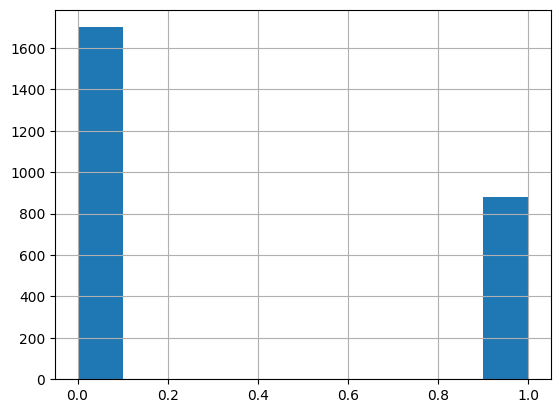

In [ ]:
# # Create a label column- based on the original overall rating column
# Note that we are labeling negative sentiment as 0 and positive as 1
df['overall_rating'] = df['overall_rating'].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1, 10:1})

print(df['overall_rating'].value_counts())
print('Positive label proportion: ', df.overall_rating.mean())
print('Ratio of positive ratings: ', round(df['overall_rating'].mean() * 100, 2), '%')

df['overall_rating'].hist()

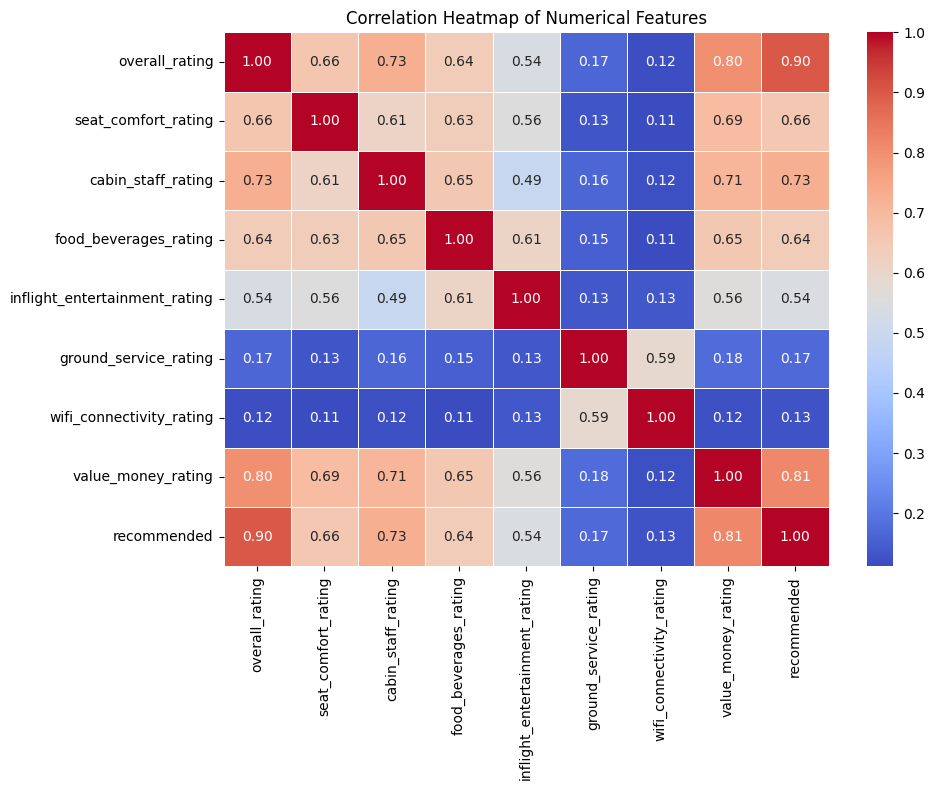

In [ ]:
#Heatmap of correlations between numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

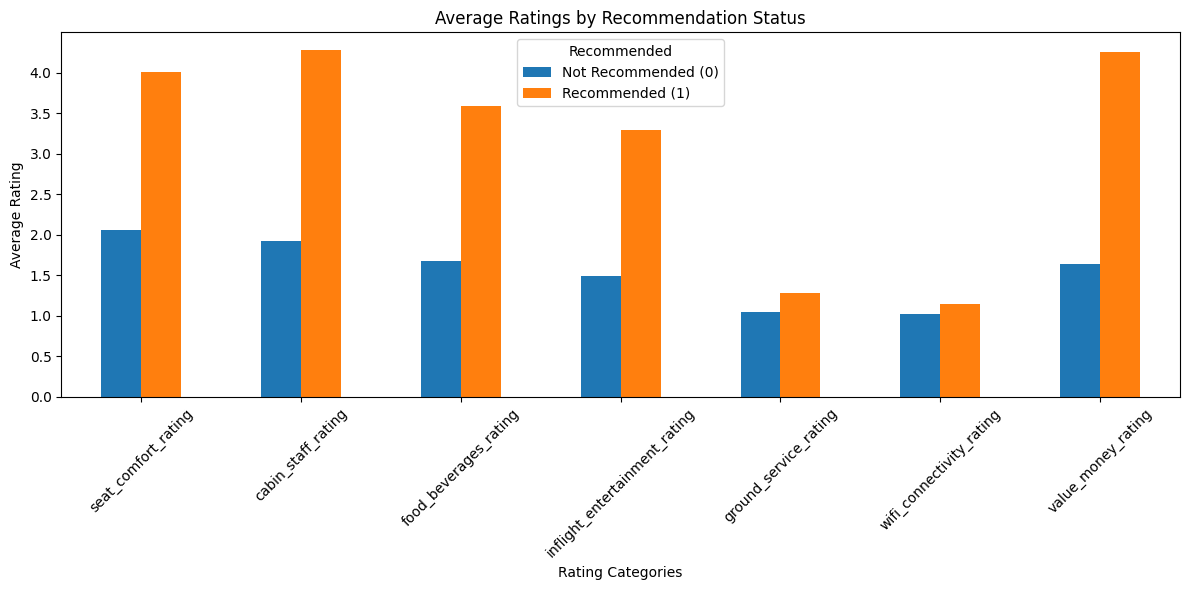

In [ ]:
# Bar plot for average ratings grouped by recommendation status
plt.figure(figsize=(10, 6))
rating_columns = [
    'seat_comfort_rating', 'cabin_staff_rating',
    'food_beverages_rating', 'inflight_entertainment_rating',
    'ground_service_rating', 'wifi_connectivity_rating',
    'value_money_rating'
]
avg_ratings_by_recommendation = df.groupby('recommended')[rating_columns].mean().T
avg_ratings_by_recommendation.plot(kind='bar', figsize=(12, 6))
plt.title('Average Ratings by Recommendation Status')
plt.ylabel('Average Rating')
plt.xlabel('Rating Categories')
plt.xticks(rotation=45)
plt.legend(title='Recommended', labels=['Not Recommended (0)', 'Recommended (1)'])
plt.tight_layout()
plt.show()


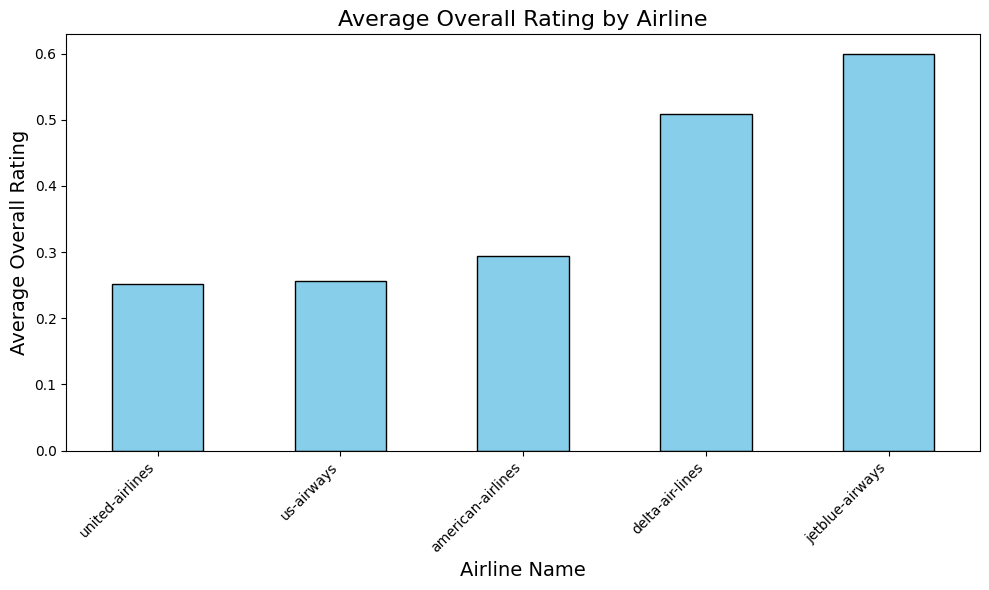

In [ ]:
# Visualization of the ratings
airline_ratings = df.groupby('airline_name')['overall_rating'].mean().sort_values()
plt.figure(figsize=(10, 6))
airline_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Overall Rating by Airline', fontsize=16)
plt.xlabel('Airline Name', fontsize=14)
plt.ylabel('Average Overall Rating', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Cluster analysis- Clustering on Text Data Using TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df['content'])

model = KMeans(n_clusters=2, max_iter=200, n_init=10)
model.fit(X)

df_n = pd.DataFrame(list(zip(df['content'], model.labels_)), columns=['content', 'cluster'])
df_n

,content,cluster
0,Our flight from MAN to JFK was cancelled due t...,0
1,"We flew from Boston, MA to St. Thomas U.S.V.I....",0
2,Long detour to get from GRU to LAX but gave me...,1
3,Be well warned that if you cross the Atlantic ...,1
4,"Business class was excellent, plenty of food c...",1
...,...,...
2575,The worst flying experience with a lack of cus...,0
2576,US Airways PhiladelphiaAthens Economy Class. J...,1
2577,Last year I flew across the United States 28 t...,1
2578,MADPHL and return. Overall good. Both planes o...,1


Cluster: 0


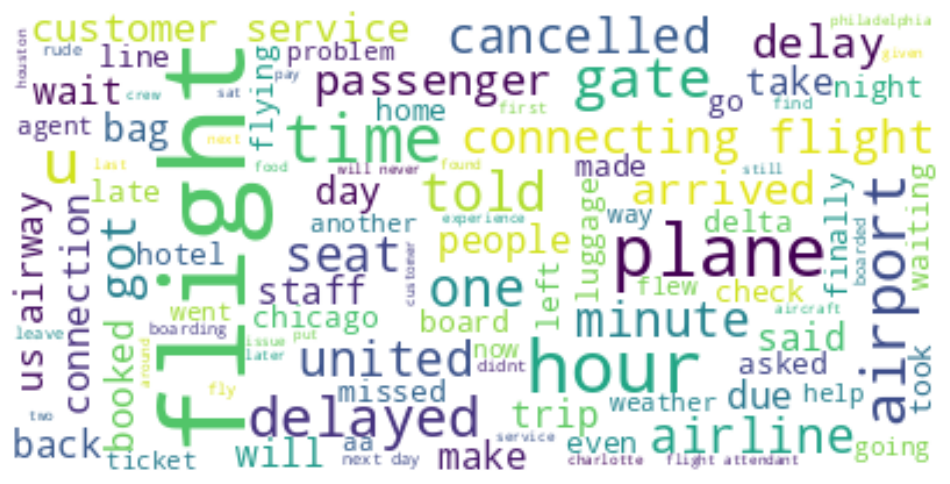

Cluster: 1


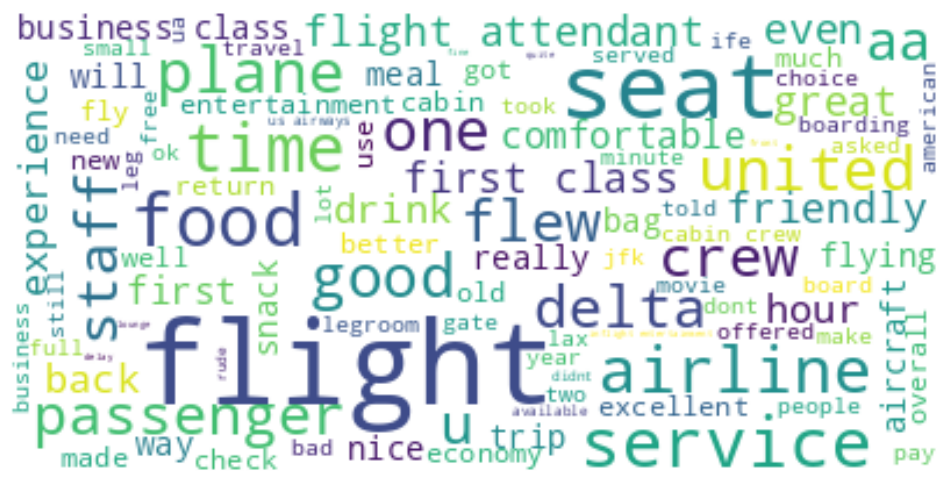

In [ ]:
# Visualizing Clusters with WordClouds
result=pd.DataFrame({'cluster':model.labels_,'content':df['content']})
for k in range(0,2):
   s=result[result.cluster==k]
   text=s['content'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure(figsize=(12, 10))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

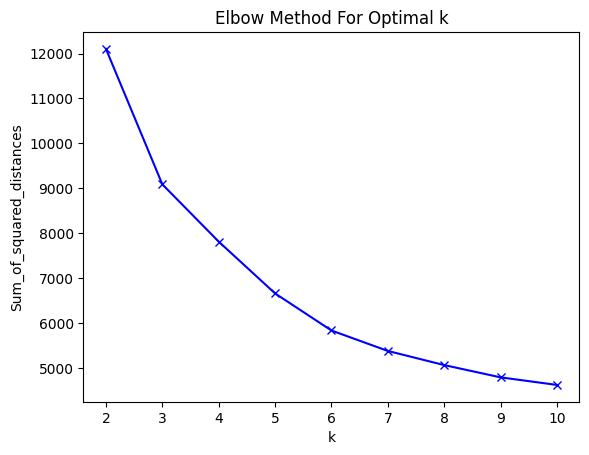

In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])

# Elbow method to find the optimal number of clusters
Sum_of_squared_distances = []
K = range(2,11)
for k in K:
   km = KMeans(n_clusters=k, random_state= 123, max_iter=200, n_init=10)
   km = km.fit(scaled_features)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**1.3 B (7) In the text cell below, describe (in paragraph format) the dataset and any important findings from your description and EDA. A discussion of class imbalance should also be included if present.**

The exploratory data analysis (EDA) of the dataset revealed significant insights into customer satisfaction and feedback regarding airline services.
The analysis highlights that overall_rating is strongly influenced by value_money_rating and seat_comfort_rating, indicating that comfort and perceived value significantly drive customer satisfaction. Customers who recommended the airline tended to give higher ratings, especially for overall satisfaction and value for money. Additionally, the histogram revealed that negative ratings from customers were typically higher, and suggesting that customers had provided the detailed feedback. Using the elbow method, it was determined that three clusters effectively group customers based on their ratings and satisfaction patterns. Lastly, the dataset exhibited a class imbalance, with a greater proportion of recommendations than non-recommendations, an important consideration for modeling.

Exploratory Data Analysis (EDA) revealed notable trends, such as the frequent mention of delays, service quality, and specific issues like canceled flights or positive in-flight experiences. Word clouds generated from clusters of reviews further highlighted these trends: Cluster 0 primarily reflects negative themes such as delays, cancellations, and gate-related issues, while Cluster 1 emphasizes positive aspects like good service, food, and first-class experiences. These findings suggest a clear segmentation in customer feedback, which can guide airlines in targeting service improvements where they are most needed. Additionally, a column chart comparing the average overall_rating across airlines revealed variability in customer satisfaction, with JetBlue Airways and Delta Airlines outperforming competitors, while United Airlines received lower ratings, indicating areas for operational improvement. The correlation matrix also provided valuable insights, with a positive correlation between timely service and higher ratings, and a negative correlation between mentions of delays and overall ratings, underscoring the impact of punctuality on customer satisfaction.

The overall_rating column exhibits a significant class imbalance, as shown in the histogram:

Rating 0.0: 1700 reviews Rating 1.0: 880 reviews This imbalance indicates that the dataset contains more negative feedback (rating 0.0) compared to positive feedback (rating 1.0). Such class imbalance can affect the performance of predictive models, potentially biasing them toward the majority class (negative ratings). This bias could lead to poor predictive performance for the minority class (positive ratings), which is often of critical importance in applications where positive feedback represents success or satisfaction.

These insights highlight key areas for improving customer satisfaction and fostering loyalty.





---

<br>



# **Part 2 (50)**

## Directions

Include your code and any required written information immediately under the relevant sections or prompts in the space provided.

You will include all prerequisite code (load packages, etc.) necessary for your code in Part 2  to run in the [Prerequisite Code](#scrollTo=FJpS12HuCNnE) Section below.

You will submit your code and written responses in this .ipynb template notebook in the space provided under the sectioned prompts. Under the prompts there are code and/or text cells provided. If additional cells are needed, add the cells under the appropriate heading.

Your Synthesis Assignment Part 2 submission should include all Part 1 and Part 2 code and responses (with all code run).

Your code and written responses should be easy for someone who did not write the code or perform the analysis to follow. Points will be deducted for extraneous code or if file naming instructions are not followed.

<br>


**Submission:**

**Due:** 12/15 at 11:59 PM ET

**Points:** 50

Your submission (one per group) for Part 2 will include:
*  (1) .ipynb file (with all code run), following the naming instructions above
* (1) .pdf of the .ipynb file (with all code run). Can be obtained using File -> Print.








## 2.0 Prerequisite Code

In [ ]:
# Install required libraries
!pip install tensorflow==2.15.1
!pip install tf-keras
!pip install tensorflow_hub==0.16.1
!pip install -U tensorflow-text==2.15.*
!pip install -U tf-models-official==2.15.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
# Download the en_core_web_lg model
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load("en_core_web_lg") # Load the en_core_web_lg model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,  ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

import spacy
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Activation, Input, TextVectorization, Embedding
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.initializers import Constant
from keras.layers import TextVectorization
import gensim
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

## 2.1 Analysis (25)

**2.1 (25) Perform (at least) 3 types of classification analysis demonstrated in the course. At least one type must be a deep learning model using either a pre-trained or data-trained embedding layer.**

In [ ]:
# Partition the dataset into training and test subsets
X = df['content']
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=321)

In [ ]:
# 2.1 Analysis: Classification Models
print("\n2.1 Analysis: Classification Models\n")

# List of models that will be built
names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net", "Naive Bayes"]

# Define the corresponding list of classifiers, set parameters where needed
classifiers = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    MultinomialNB()
]

# Iterate through the list of models
# Execute the pipeline (TFIDF Vectorizer + model) for each

for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),  # Transforms word/count features into word/tfidf feature vector
        ('classifier', clf),          # Builds the respective classification model
        ])

    # Fit the pipeline on training data
    clf_pipe.fit(X_train, y_train)

    # Generate predictions
    pred = clf_pipe.predict(X_test)
    pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

    # Print the model name and classification report
    print(f'\n\n{name} - Classification Report:\n')
    print(classification_report(y_test, pred))
    print('-' * 80)


2.1 Analysis: Classification Models



Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1252
           1       1.00      0.01      0.01       184

    accuracy                           0.87      1436
   macro avg       0.94      0.50      0.47      1436
weighted avg       0.89      0.87      0.81      1436

--------------------------------------------------------------------------------


SVM - Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1252
           1       1.00      0.01      0.01       184

    accuracy                           0.87      1436
   macro avg       0.94      0.50      0.47      1436
weighted avg       0.89      0.87      0.81      1436

--------------------------------------------------------------------------------


Decision Tree - Classification Report:

              precision 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/e



AdaBoost - Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1252
           1       0.45      0.12      0.20       184

    accuracy                           0.87      1436
   macro avg       0.67      0.55      0.56      1436
weighted avg       0.83      0.87      0.83      1436

--------------------------------------------------------------------------------


Neural Net - Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1252
           1       0.00      0.00      0.00       184

    accuracy                           0.87      1436
   macro avg       0.44      0.50      0.47      1436
weighted avg       0.76      0.87      0.81      1436

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




Naive Bayes - Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1252
           1       0.00      0.00      0.00       184

    accuracy                           0.87      1436
   macro avg       0.44      0.50      0.47      1436
weighted avg       0.76      0.87      0.81      1436

--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Tokenization for Deep Learning Models
# Instantiate the Tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the training set of reviews (vocabulary preparation)
tokenizer.fit_on_texts(list(X_train))

# Convert the Review Text into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Calculate mean and standard deviation of token lengths
mean_length = np.mean([len(seq) for seq in X_train_seq + X_test_seq])
std_length = np.std([len(seq) for seq in X_train_seq + X_test_seq])
max_length = int(np.ceil(mean_length + 2 * std_length))

print("Mean token length:", mean_length)
print("Standard deviation of token length:", std_length)
print("Max sequence length:", max_length)

Mean token length: 139.2158914728682
Standard deviation of token length: 81.03989530584317
Max sequence length: 302


In [ ]:
# Pad sequences using calculated max_length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 10739


In [ ]:
# 2.1 Analysis: Deep Learning - LSTM
print("\n2.1 Analysis: Deep Learning - LSTM\n")

# Define LSTM Model
clear_session()

model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length, trainable=True))
model.add(LSTM(128, return_sequences=True, dropout=0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Metrics
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

# Callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_lstm_model.G14', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Summary
print(model.summary())

# Fit the Model
history = model.fit(np.array(X_train_seq),np.array(y_train),batch_size=128,epochs=10,
                    validation_data=(np.array(X_test_seq),np.array(y_test)),verbose=1,callbacks=[es,mc])

# Evaluate Model
model_results = model.evaluate(X_test_seq, y_test, batch_size=128, verbose=0)

# Save the Best Model
print("\nTraining Complete. Best model saved as 'best_lstm_model.G14'.")


2.1 Analysis: Deep Learning - LSTM

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 302, 300)          3221700   
                                                                 
 lstm (LSTM)                 (None, 302, 128)          219648    
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3449669 (13.16 MB)
Trainable params: 3449669 (13.16 MB)
Non-trainable p

In [ ]:
# 2.1 Analysis: Classification Models - Word2Vec + Logistic Regression
print("\n2.1 Analysis: Classification Models - Word2Vec + Logistic Regression\n")

# Train Word2Vec model using the training data
print("Training Word2Vec model...\n")
w2v = gensim.models.Word2Vec(
    sentences=X_train.apply(lambda x: x.split()),  # Tokenized training text
    vector_size=200,  # Dimensionality of the word vectors
    window=10,        # Maximum distance between the current and predicted word
    min_count=2,      # Ignores words with a frequency lower than this
    epochs=20         # Number of iterations over the dataset
)

# Function to compute document vectors
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    tokens = doc.split()  # Tokenize text into words
    tokens = [word for word in tokens if word in w2v.wv.key_to_index]  # Filter out OOV words
    return np.mean(w2v.wv[tokens], axis=0) if tokens else np.zeros(w2v.vector_size)

# Apply the document vector transformation to both training and testing sets
print("Generating document vectors for training and testing sets...\n")
X_train_vectors = np.array([document_vector(doc) for doc in X_train])
X_test_vectors = np.array([document_vector(doc) for doc in X_test])

# Encode labels (if not already encoded)
print("Encoding labels...\n")
l_enc = LabelEncoder()
y_train_encoded = l_enc.fit_transform(y_train)
y_test_encoded = l_enc.transform(y_test)

# Train Logistic Regression model
print("Training Logistic Regression model...\n")
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_vectors, y_train_encoded)

# Make predictions
print("Making predictions...\n")
pred = lr.predict(X_test_vectors)
pred_prob = lr.predict_proba(X_test_vectors)[:, 1]

# Evaluate the model
print("\nClassification Report:\n")
print(classification_report(y_test_encoded, pred))

# Print the label encoding mapping
print("\nLabel Encoding Mapping:")
for idx, label in enumerate(l_enc.classes_):
    print(f"{idx}: {label}")


2.1 Analysis: Classification Models - Word2Vec + Logistic Regression

Training Word2Vec model...

Generating document vectors for training and testing sets...

Encoding labels...

Training Logistic Regression model...

Making predictions...


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       428
           1       0.82      0.68      0.74       217

    accuracy                           0.84       645
   macro avg       0.83      0.80      0.81       645
weighted avg       0.84      0.84      0.84       645


Label Encoding Mapping:
0: 0.0
1: 1.0


In [ ]:
# 2.1 Analysis: Classification Models - Complement Naïve Bayes
print("\n2.1 Analysis: Classification Models - Complement Naïve Bayes\n")

# Define CNB pipeline
nb_sent2 = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('nb', ComplementNB()),
])

# Fit CNB model
print("Training Complement Naïve Bayes model...\n")
nb_sent2.fit(X_train, y_train)

# Evaluate CNB model
print("Evaluating Complement Naïve Bayes model...\n")
cnb_pred = nb_sent2.predict(X_test)
cnb_pred_prob = nb_sent2.predict_proba(X_test)[:, 1]

# Classification Report
print("\nComplement Naïve Bayes - Classification Report:")
print(classification_report(y_test, cnb_pred))

# AUC Metrics
fpr, tpr, _ = roc_curve(y_test, cnb_pred_prob)
precision, recall, _ = precision_recall_curve(y_test, cnb_pred_prob)

print(f"ROC AUC: {auc(fpr, tpr):.3f}")
print(f"Precision/Recall AUC: {auc(recall, precision):.3f}")

# Test predictions on new reviews (sampled or synthetic relevant reviews for your dataset)
test_revs = [
    'This product is amazing, I love it so much!',
    'Terrible quality, broke after one use.',
    'Good value for the price, but not perfect.',
    'Disappointed with the customer service.',
    'Exceeded my expectations. Highly recommend!'
]
print("\nTest Predictions:")
print(f"Test Reviews: {test_revs}")
print("CNB Sentiment Probabilities:", nb_sent2.predict_proba(test_revs)[:, 1])


2.1 Analysis: Classification Models - Complement Naïve Bayes

Training Complement Naïve Bayes model...

Evaluating Complement Naïve Bayes model...


Complement Naïve Bayes - Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       428
         1.0       0.88      0.59      0.70       217

    accuracy                           0.83       645
   macro avg       0.85      0.77      0.79       645
weighted avg       0.84      0.83      0.82       645

ROC AUC: 0.907
Precision/Recall AUC: 0.846

Test Predictions:
Test Reviews: ['This product is amazing, I love it so much!', 'Terrible quality, broke after one use.', 'Good value for the price, but not perfect.', 'Disappointed with the customer service.', 'Exceeded my expectations. Highly recommend!']
CNB Sentiment Probabilities: [0.78757491 0.31839685 0.76215948 0.19256166 0.75742456]


In [ ]:
# 2.1 Analysis: Deep Learning - BERT
print("\n2.1 Analysis: Deep Learning - BERT\n")

# Define the BERT model and preprocessing URLs
bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

# Load BERT components
tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


2.1 Analysis: Deep Learning - BERT

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
# Preprocessing with TensorFlow Hub
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')

# Test preprocessing on example input
text_test = ['this is a great product!']
text_preprocessed = bert_preprocess_model(text_test)

# Inspect preprocessed outputs
print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

# Clear the Session
clear_session()

# Build BERT classifier model
def build_bert_classifier():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dense(128, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
    return tf.keras.Model(text_input, net)

bert_classifier = build_bert_classifier()

# Compile the BERT model
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

optimizer = optimization.create_optimizer(
    init_lr=3e-5, num_train_steps=1000, num_warmup_steps=100, optimizer_type='adamw'
)
bert_classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=METRICS)

# Train the BERT model
history = bert_classifier.fit(
    X_train.values,
    y_train,
    validation_data=(X_test.values, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 1037 2307 4031  999  102    0    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]
Epoch 1/10
61/61 [==============================] - 45s 661ms/step - loss: 0.7649 - accuracy: 0.4656 - precision: 0.3596 - recall: 0.7164 - auc: 0.5468 - val_loss: 0.6038 - val_accuracy: 0.6682 - val_precision: 0.8000 - val_recall: 0.0184 - val_auc: 0.7509
Epoch 2/10
61/61 [==============================] - 39s 639ms/step - loss: 0.6003 - accuracy: 0.6811 - precision: 0.5833 - recall: 0.2428 - auc: 0.6757 - val_loss: 0.5271 - val_accuracy: 0.7457 - val_precision: 0.7477 - val_recall: 0.3687 - val_auc: 0.8084
Epoch 3/10
61/61 [==============================] - 36s 589ms/step - loss: 0.5280 - accuracy: 0.7452 - precision: 0.6735 - recall: 0.4977 - auc: 0.7845 - val_loss: 0.4710 - val_accuracy: 0.7845 - val_precision: 0.7143 - val_recall: 0.5991 - val_au

## 2.2 Model Evaluation (15)

**2.2 A (8) Evaluate the models on both the training and testing sets to obtain both performance and goodness of fit.**

In [ ]:
print("\n2.2A Evaluate Classification Models\n")

# List of models to be built
names = ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "AdaBoost", "Neural Net", "Naive Bayes"]

# Define the corresponding list of classifiers, set parameters where needed
classifiers = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10),
    AdaBoostClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    MultinomialNB()
]

# Iterate through the list of models
for name, clf in zip(names, classifiers):
    # Create a pipeline with TFIDF Vectorizer and classifier
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', clf),
    ])

    # Fit the pipeline on the training data
    clf_pipe.fit(X_train, y_train)

    # Generate predictions and probabilities for both training and test sets
    train_pred = clf_pipe.predict(X_train)
    train_pred_prob = clf_pipe.predict_proba(X_train)[:, 1]

    test_pred = clf_pipe.predict(X_test)
    test_pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

    # Compute ROC curve and Precision-Recall curve for training set
    train_fpr, train_tpr, _ = roc_curve(y_train, train_pred_prob)
    train_precision, train_recall, _ = precision_recall_curve(y_train, train_pred_prob)

    # Compute ROC curve and Precision-Recall curve for test set
    test_fpr, test_tpr, _ = roc_curve(y_test, test_pred_prob)
    test_precision, test_recall, _ = precision_recall_curve(y_test, test_pred_prob)

    # Print model name and evaluation metrics
    print('\n\n', name, '\n\n')
    print('Training Set:')
    print('ROC AUC: ', auc(train_fpr, train_tpr))
    print('Precision/Recall AUC: ', auc(train_recall, train_precision))
    print(classification_report(y_train, train_pred))

    print('\nTest Set:')
    print('ROC AUC: ', auc(test_fpr, test_tpr))
    print('Precision/Recall AUC: ', auc(test_recall, test_precision))
    print(classification_report(y_test, test_pred))
    print('-' * 80)


2.2A Evaluate Classification Models



 Logistic Regression 


Training Set:
ROC AUC:  0.9858324558657522
Precision/Recall AUC:  0.9776536507848872
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1272
         1.0       0.97      0.85      0.90       663

    accuracy                           0.94      1935
   macro avg       0.95      0.92      0.93      1935
weighted avg       0.94      0.94      0.94      1935


Test Set:
ROC AUC:  0.9444958869891037
Precision/Recall AUC:  0.9031363810336615
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       428
         1.0       0.88      0.72      0.79       217

    accuracy                           0.87       645
   macro avg       0.88      0.84      0.85       645
weighted avg       0.88      0.87      0.87       645

--------------------------------------------------------------------------------


 SVM 


Training Set:
ROC AUC:  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(




 AdaBoost 


Training Set:
ROC AUC:  0.9759289298689965
Precision/Recall AUC:  0.9567711016896729
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1272
         1.0       0.89      0.84      0.87       663

    accuracy                           0.91      1935
   macro avg       0.91      0.89      0.90      1935
weighted avg       0.91      0.91      0.91      1935


Test Set:
ROC AUC:  0.9166792282182695
Precision/Recall AUC:  0.8753514724250007
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       428
         1.0       0.83      0.78      0.80       217

    accuracy                           0.87       645
   macro avg       0.86      0.85      0.86       645
weighted avg       0.87      0.87      0.87       645

--------------------------------------------------------------------------------


 Neural Net 


Training Set:
ROC AUC:  0.9975134465977973
Precision/Recall AUC:  

In [ ]:
print("\n2.2A Evaluate the LSTM Model\n")

# Load the saved LSTM model
model = load_model('/content/best_lstm_model.G14')

# Evaluate on the test set
print("Evaluating LSTM Model on Test Set...")
model_results = model.evaluate(X_test_seq, y_test, batch_size=128, verbose=0)
print("\nLSTM Model Performance on Test Set:\n")
for name, value in zip(model.metrics_names, model_results):
    print(f"{name}: {value:.4f}")

# Evaluate on the training set
print("\nEvaluating LSTM Model on Training Set...")
model_train_results = model.evaluate(X_train_seq, y_train, batch_size=128, verbose=0)
print("\nLSTM Model Performance on Training Set:\n")
for name, value in zip(model.metrics_names, model_train_results):
    print(f"{name}: {value:.4f}")

# Generate predicted probabilities for LSTM
lstm_test_pred_prob = model.predict(X_test_seq).ravel()


2.2A Evaluate the LSTM Model

Evaluating LSTM Model on Test Set...

LSTM Model Performance on Test Set:

loss: 0.3531
accuracy: 0.8605
precision: 0.8713
recall: 0.6866
auc: 0.9350

Evaluating LSTM Model on Training Set...

LSTM Model Performance on Training Set:

loss: 0.1039
accuracy: 0.9757
precision: 0.9936
recall: 0.9351
auc: 0.9950
21/21 [==============================] - 4s 174ms/step


In [ ]:
print("\n2.2A Evaluation: Word2Vec + Logistic Regression\n")

# Evaluate on training set
print("Evaluating Word2Vec + Logistic Regression on Training Set...")
train_pred_lr = lr.predict(X_train_vectors)
train_pred_prob_lr = lr.predict_proba(X_train_vectors)[:, 1]

# Evaluate on test set
print("Evaluating Word2Vec + Logistic Regression on Test Set...")
test_pred_lr = lr.predict(X_test_vectors)
test_pred_prob_lr = lr.predict_proba(X_test_vectors)[:, 1]

# Training Set Metrics
train_fpr_lr, train_tpr_lr, _ = roc_curve(y_train_encoded, train_pred_prob_lr)
train_precision_lr, train_recall_lr, _ = precision_recall_curve(y_train_encoded, train_pred_prob_lr)

print("\nWord2Vec + Logistic Regression - Training Set:")
print(f"ROC AUC: {auc(train_fpr_lr, train_tpr_lr):.3f}")
print(f"Precision/Recall AUC: {auc(train_recall_lr, train_precision_lr):.3f}")
print(classification_report(y_train_encoded, train_pred_lr))

# Test Set Metrics
test_fpr_lr, test_tpr_lr, _ = roc_curve(y_test_encoded, test_pred_prob_lr)
test_precision_lr, test_recall_lr, _ = precision_recall_curve(y_test_encoded, test_pred_prob_lr)

print("\nWord2Vec + Logistic Regression - Test Set:")
print(f"ROC AUC: {auc(test_fpr_lr, test_tpr_lr):.3f}")
print(f"Precision/Recall AUC: {auc(test_recall_lr, test_precision_lr):.3f}")
print(classification_report(y_test_encoded, test_pred_lr))


2.2A Evaluation: Word2Vec + Logistic Regression

Evaluating Word2Vec + Logistic Regression on Training Set...
Evaluating Word2Vec + Logistic Regression on Test Set...

Word2Vec + Logistic Regression - Training Set:
ROC AUC: 0.939
Precision/Recall AUC: 0.894
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1272
           1       0.84      0.78      0.81       663

    accuracy                           0.87      1935
   macro avg       0.87      0.85      0.86      1935
weighted avg       0.87      0.87      0.87      1935


Word2Vec + Logistic Regression - Test Set:
ROC AUC: 0.920
Precision/Recall AUC: 0.855
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       428
           1       0.82      0.68      0.74       217

    accuracy                           0.84       645
   macro avg       0.83      0.80      0.81       645
weighted avg       0.84      0.84      0.84       645



In [ ]:
print("\n2.2A Evaluation: Complement Naïve Bayes\n")

# Evaluate on training set
print("Evaluating Complement Naïve Bayes on Training Set...")
train_pred_cnb = nb_sent2.predict(X_train)
train_pred_prob_cnb = nb_sent2.predict_proba(X_train)[:, 1]

# Evaluate on test set
print("Evaluating Complement Naïve Bayes on Test Set...")
test_pred_cnb = nb_sent2.predict(X_test)
test_pred_prob_cnb = nb_sent2.predict_proba(X_test)[:, 1]

# Training Set Metrics
train_fpr_cnb, train_tpr_cnb, _ = roc_curve(y_train, train_pred_prob_cnb)
train_precision_cnb, train_recall_cnb, _ = precision_recall_curve(y_train, train_pred_prob_cnb)

print("\nComplement Naïve Bayes - Training Set:")
print(f"ROC AUC: {auc(train_fpr_cnb, train_tpr_cnb):.3f}")
print(f"Precision/Recall AUC: {auc(train_recall_cnb, train_precision_cnb):.3f}")
print(classification_report(y_train, train_pred_cnb))

# Test Set Metrics
test_fpr_cnb, test_tpr_cnb, _ = roc_curve(y_test, test_pred_prob_cnb)
test_precision_cnb, test_recall_cnb, _ = precision_recall_curve(y_test, test_pred_prob_cnb)

print("\nComplement Naïve Bayes - Test Set:")
print(f"ROC AUC: {auc(test_fpr_cnb, test_tpr_cnb):.3f}")
print(f"Precision/Recall AUC: {auc(test_recall_cnb, test_precision_cnb):.3f}")
print(classification_report(y_test, test_pred_cnb))


2.2A Evaluation: Complement Naïve Bayes

Evaluating Complement Naïve Bayes on Training Set...
Evaluating Complement Naïve Bayes on Test Set...

Complement Naïve Bayes - Training Set:
ROC AUC: 0.976
Precision/Recall AUC: 0.963
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      1272
         1.0       0.95      0.81      0.87       663

    accuracy                           0.92      1935
   macro avg       0.93      0.89      0.91      1935
weighted avg       0.92      0.92      0.92      1935


Complement Naïve Bayes - Test Set:
ROC AUC: 0.907
Precision/Recall AUC: 0.846
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       428
         1.0       0.88      0.59      0.70       217

    accuracy                           0.83       645
   macro avg       0.85      0.77      0.79       645
weighted avg       0.84      0.83      0.82       645



In [ ]:
print("\n2.2A Evaluate the BERT Model\n")

# Evaluate on the test set
print("Evaluating BERT Model on Test Set...")
bert_results = bert_classifier.evaluate(X_test.values, y_test, verbose=0)
print("\nBERT Model Performance on Test Set:\n")
for name, value in zip(bert_classifier.metrics_names, bert_results):
    print(f"{name}: {value:.4f}")

# Evaluate on the training set
print("\nEvaluating BERT Model on Training Set...")
bert_train_results = bert_classifier.evaluate(X_train.values, y_train, verbose=0)
print("\nBERT Model Performance on Training Set:\n")
for name, value in zip(bert_classifier.metrics_names, bert_train_results):
    print(f"{name}: {value:.4f}")

# Get the predicted probabilities from the BERT classifier
bert_test_pred_prob = bert_classifier.predict(X_test.values).ravel()


2.2A Evaluate the BERT Model

Evaluating BERT Model on Test Set...

BERT Model Performance on Test Set:

loss: 0.3770
accuracy: 0.8558
precision: 0.8131
recall: 0.7419
auc: 0.9030

Evaluating BERT Model on Training Set...

BERT Model Performance on Training Set:

loss: 0.2476
accuracy: 0.9070
precision: 0.8768
recall: 0.8477
auc: 0.9577
21/21 [==============================] - 3s 135ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


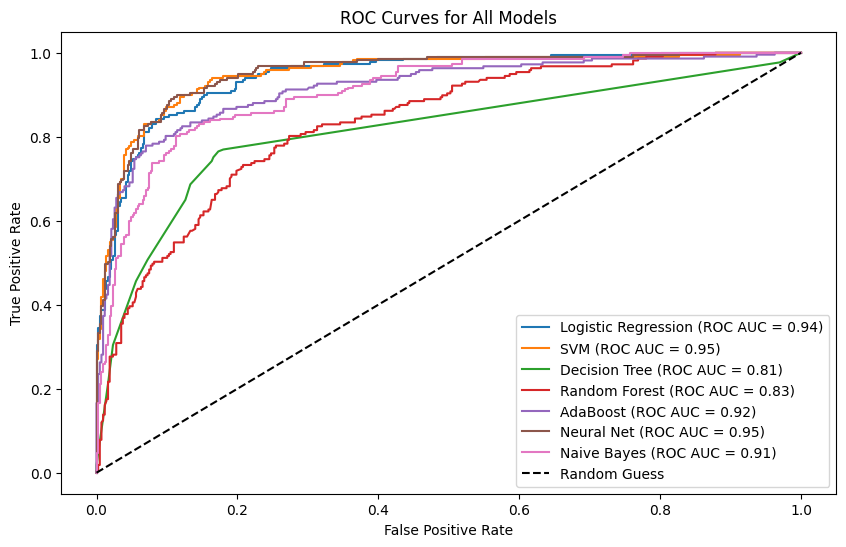

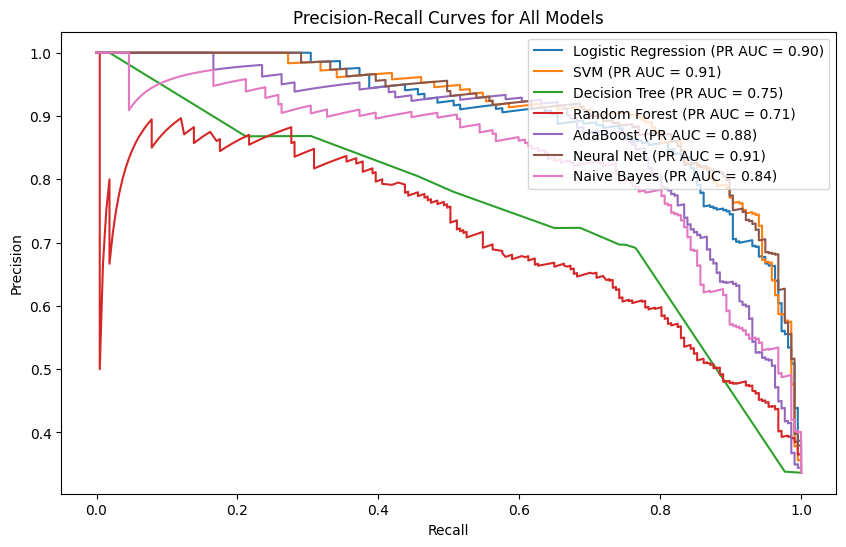

In [ ]:
# Store results for ROC and PR curves
roc_data = []
pr_data = []

# Iterate through all models and collect performance data
for name, clf in zip(names, classifiers):
    # Create a pipeline with TFIDF Vectorizer and classifier
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('classifier', clf),
    ])

    # Fit the pipeline on the training data
    clf_pipe.fit(X_train, y_train)

    # Generate probabilities for the test set
    test_pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, test_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_data.append((name, fpr, tpr, roc_auc))

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, test_pred_prob)
    pr_auc = auc(recall, precision)
    pr_data.append((name, precision, recall, pr_auc))

# Plot ROC Curves
plt.figure(figsize=(10, 6))
for name, fpr, tpr, roc_auc in roc_data:
    plt.plot(fpr, tpr, label=f"{name} (ROC AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))
for name, precision, recall, pr_auc in pr_data:
    plt.plot(recall, precision, label=f"{name} (PR AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="upper right")
plt.show()


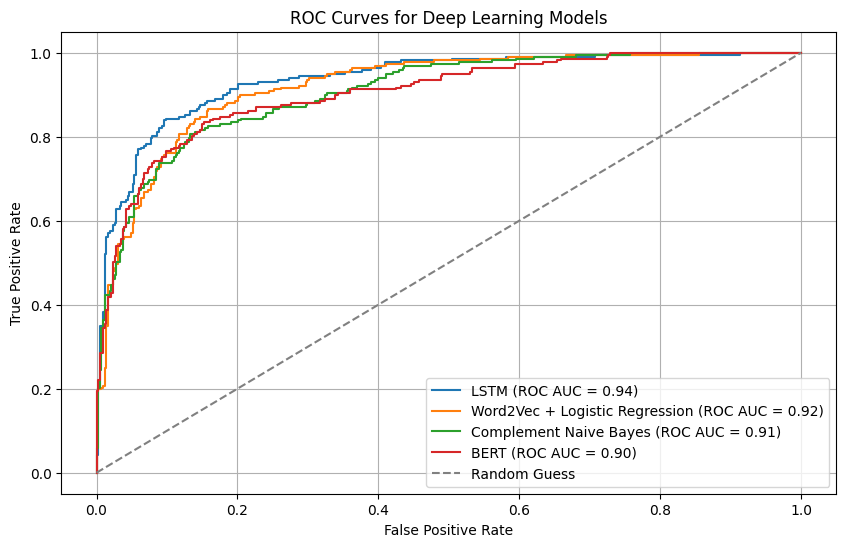

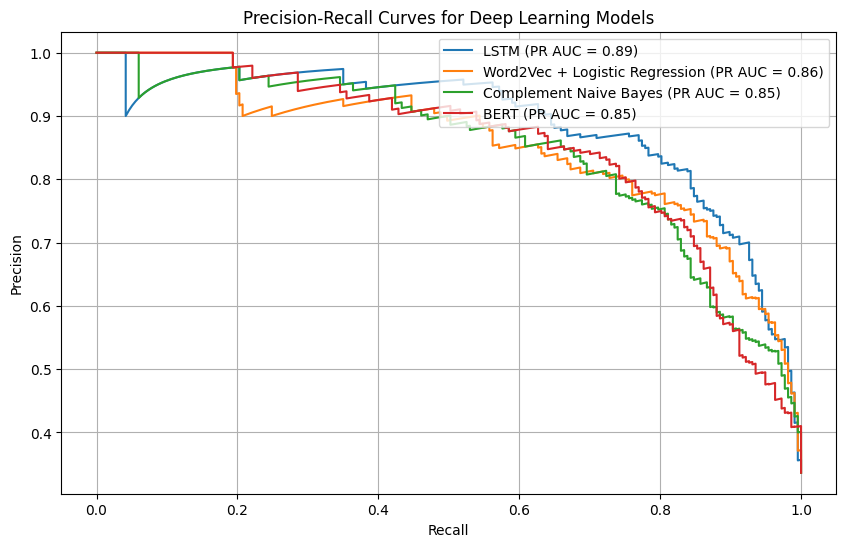

In [ ]:
# Define the deep learning models and their probabilities
deep_learning_models = {
  "LSTM": {"y_true": y_test, "y_prob": lstm_test_pred_prob},
  "Word2Vec + Logistic Regression": {"y_true": y_test_encoded, "y_prob": test_pred_prob_lr},
  "Complement Naive Bayes": {"y_true": y_test, "y_prob": test_pred_prob_cnb},
  "BERT": {"y_true": y_test, "y_prob": bert_test_pred_prob},
}

# Initialize plots for ROC curves for deep learning models
plt.figure(figsize=(10, 6))
for model_name, data in deep_learning_models.items():
    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(data["y_true"], data["y_prob"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (ROC AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Customize the ROC plot
plt.title("ROC Curves for Deep Learning Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Initialize plots for Precision-Recall curves for deep learning models
plt.figure(figsize=(10, 6))
for model_name, data in deep_learning_models.items():
    # Compute Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(data["y_true"], data["y_prob"])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{model_name} (PR AUC = {pr_auc:.2f})")

# Customize the PR plot
plt.title("Precision-Recall Curves for Deep Learning Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right")
plt.grid()
plt.show()

**2.2 B (7) Based on your output in 2.2A, discuss and compare the goodness of fit and performance for each of the classification models. Which model is preferred? Why? Explain.**

Based on the evaluations, we can summarize the performance of the models as follows:

SVM and Neural Net achieved the highest ROC AUC scores on the training set, indicating excellent fit to the training data. However, SVM showed a slight drop in performance on the test set compared to its training results, suggesting potential overfitting. The Neural Net also performed well on the test set, maintaining a high ROC AUC of 0.951.

Logistic Regression and AdaBoost demonstrated solid performance across both training and test sets, with ROC AUC scores of 0.944 and 0.917 respectively on the test set. These models are generally more interpretable and may be preferred in scenarios where model explainability is crucial.

LSTM showed competitive results, particularly on the training set, with an accuracy of 0.9757. However, its performance on the test set (accuracy of 0.8605) was lower than that of the best-performing models, indicating that while it captures complex patterns, it may not generalize as well as simpler models.

Complement Naive Bayes and Naive Bayes performed reasonably well, especially on the training set, but their test set results were less impressive, particularly in terms of recall for the positive class.

Decision Tree and Random Forest models struggled with overfitting, as evidenced by their high training set scores but significantly lower test set performance. This suggests that these models may not be capturing the underlying patterns effectively.

Preferred Model
Considering the balance between performance and interpretability, Logistic Regression or AdaBoost could be preferred choices for this classification task. They provide a good trade-off between accuracy and the ability to explain predictions. However, if the goal is to maximize predictive performance, Neural Net or SVM would be the top contenders, with the understanding that they may require more careful tuning and validation to avoid overfitting.

## 2.3 Discussion & Conclusion (10)

**2.3 (10) Briefly summarize the problem statement and data. Then, discuss your analysis and findings. Within the context of the business problem and your analysis results, provide business recommendations. Be sure to discuss any limitations, constraints, or ethical concerns that could impact the implementation of the recommended solution.**

Problem Statement & Data:

Problem Statement: The airline industry faces intense competition, with customer satisfaction being a key differentiator. The goal is to predict customer ratings based on various service quality features collected in the airlines.csv dataset.
Data: The dataset includes customer ratings and features related to service quality, seat comfort, cabin staff, food and beverages, inflight entertainment, ground service, wifi connectivity, and value for money.
The goal is to evaluate and compare deep learning and machine learning models (LSTM, Word2Vec + Logistic Regression, Complement Naive Bayes, and BERT) for a classification task. Models are assessed using ROC AUC and Precision-Recall (PR) AUC to measure predictive performance.

Analysis & Findings:

Model Performance: LSTM performs best with ROC AUC = 0.94 and PR AUC = 0.89, showing strong predictive capability. Word2Vec + Logistic Regression follows closely (ROC AUC = 0.92, PR AUC = 0.86). Complement Naive Bayes and BERT perform slightly lower but are still competitive (PR AUC = 0.85). Insights:The analysis revealed that SVM and Neural Net achieved the highest ROC AUC scores, indicating strong performance on training data. However, SVM showed signs of overfitting, while the Neural Net maintained high performance on the test set. Logistic Regression and AdaBoost provided solid performance with better interpretability, making them suitable for practical applications. LSTM excels at balancing precision and recall and minimizes false predictions.

Model Selection: Logistic Regression or AdaBoost is recommended for their balance of accuracy and interpretability. For maximum predictive performance, Neural Net or SVM could be considered, with caution regarding overfitting. Deploy LSTM as the primary model due to its superior performance. Monitor model performance over time to address potential data changes. For lower computational resources, consider Word2Vec + Logistic Regression as an alternative. Limitations Class imbalance may impact results, requiring careful monitoring. Computational costs for LSTM and BERT can be high. Address any ethical concerns to avoid biases in predictions.

Business Recommendations:

Customer Satisfaction Improvement: Utilize the predictive models to identify key factors affecting customer ratings and enhance service delivery accordingly.
Targeted Marketing Strategies: Leverage insights from the models to develop targeted marketing campaigns aimed at improving customer loyalty and satisfaction.
Real-time Feedback Integration: Implement the model into customer feedback systems to provide real-time insights into passenger satisfaction, allowing for prompt responses to issues.

Limitations, Constraints & Ethical Concerns:

Data Quality: The accuracy of predictions is contingent on the quality of the data collected. Any biases or inaccuracies in the dataset could lead to misleading results.
Privacy Issues: The use of customer data raises ethical concerns regarding privacy and data protection, necessitating careful handling and compliance with regulations.
Model Complexity: More complex models like Neural Nets may lack interpretability, making it challenging to explain predictions to stakeholders.

Conclusion: The predictive models developed from the airlines.csv dataset offer valuable insights into customer satisfaction. By addressing limitations and ethical concerns, airlines can leverage these models to enhance service quality, improve customer experiences, and ultimately drive profitability. By leveraging the LSTM model, the business can achieve optimal accuracy while managing resources and ethical risks.